In [ ]:
!pip install transformers
import json
import sqlite3
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import datetime
%matplotlib inline
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**First Analysis: Calculating percentage of resturants that are still open or closed and provide certain services like delivery or takeout, to see if resturants having these services are less likely to close down**

In [ ]:
# converting yelp businesses JSON file to Pandas dataframe, and then filtering for only restaurants
yelp_business = []
for line in open('/content/drive/MyDrive/INST 414 Project/yelp_academic_dataset_business.json', 'r',encoding="cp866"):
    yelp_business.append(json.loads(line))
business_df = json_normalize(yelp_business)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
restaurants_df = business_df[business_df.categories.str.contains('Restaurants', na = False)]
restaurants_df1 = restaurants_df[['business_id', 'name', 'city','stars', 'is_open', 'attributes.RestaurantsTakeOut', 'attributes.RestaurantsDelivery', 'attributes.Caters',
'attributes.OutdoorSeating', 'attributes.RestaurantsReservations', 'attributes.DriveThru', 'attributes.RestaurantsCounterService']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [ ]:
#making a dataframe that only has restaurants that are currently open
open_resturants = restaurants_df1.loc[restaurants_df1['is_open']==1]

In [ ]:
#making a dataframe that only has restaurants that are closed
closed_resturants = restaurants_df1.loc[restaurants_df1['is_open']==0]

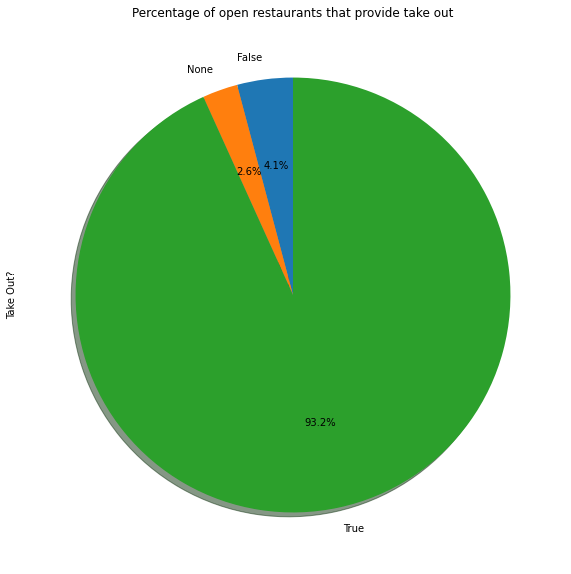

In [ ]:
graph = open_resturants[["attributes.RestaurantsTakeOut"]].groupby(["attributes.RestaurantsTakeOut"]).size()
plot = graph.plot(kind='pie', subplots=False, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plot.set_ylabel("Take Out?")
plt.title("Percentage of open restaurants that provide take out")
plot

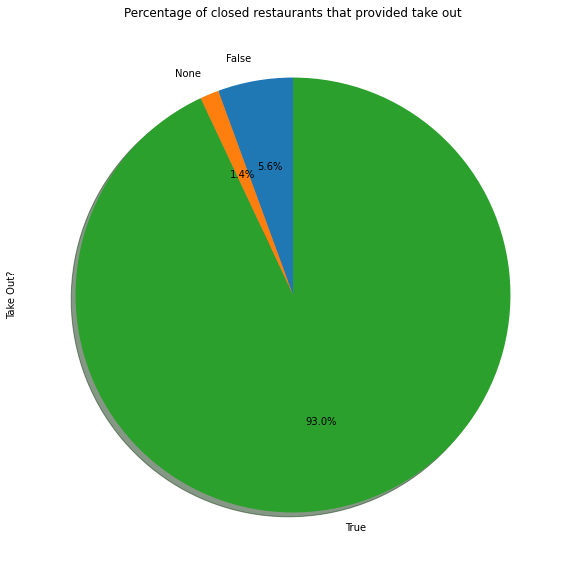

In [ ]:
graph2 = closed_resturants[["attributes.RestaurantsTakeOut"]].groupby(["attributes.RestaurantsTakeOut"]).size()
plot2 = graph2.plot(kind='pie', subplots=False, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plot2.set_ylabel("Take Out?")
plt.title("Percentage of closed restaurants that provided take out")
plot2

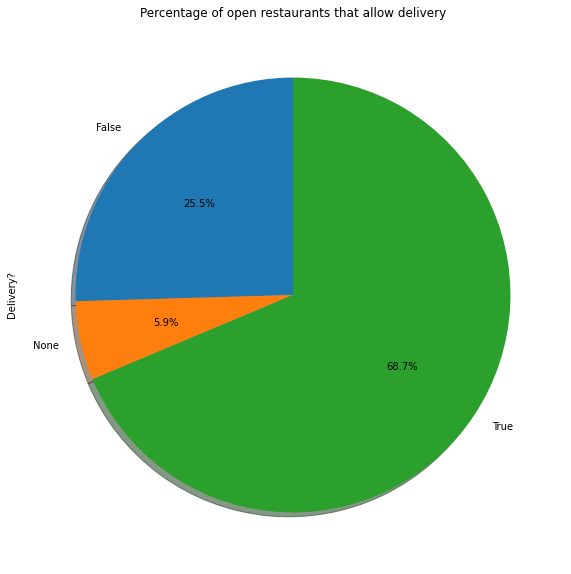

In [ ]:
graph3 = open_resturants[["attributes.RestaurantsDelivery"]].groupby(["attributes.RestaurantsDelivery"]).size()
open_resturants_delivery = graph3.plot(kind='pie', subplots=False, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
open_resturants_delivery.set_ylabel("Delivery?")
plt.title("Percentage of open restaurants that allow delivery")
open_resturants_delivery

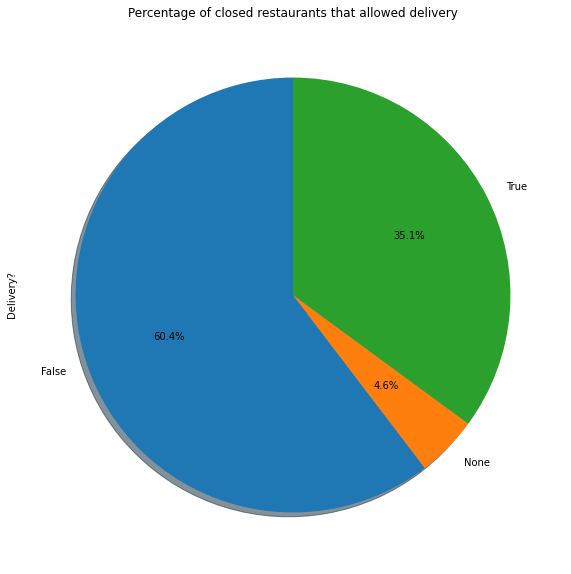

In [ ]:
graph4 = closed_resturants[["attributes.RestaurantsDelivery"]].groupby(["attributes.RestaurantsDelivery"]).size()
closed_resturants_delivery = graph4.plot(kind='pie', subplots=False, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
closed_resturants_delivery.set_ylabel("Delivery?")
plt.title("Percentage of closed restaurants that allowed delivery")
closed_resturants_delivery

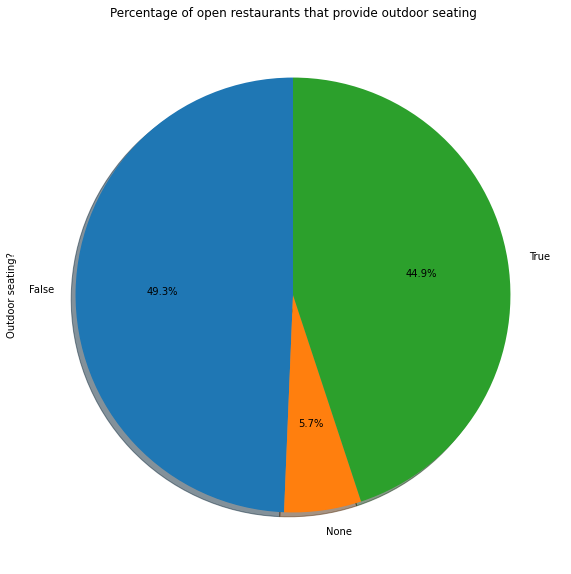

In [ ]:
graph5 = open_resturants[["attributes.OutdoorSeating"]].groupby(["attributes.OutdoorSeating"]).size()
open_resturants_outdoor = graph5.plot(kind='pie', subplots=False, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
open_resturants_outdoor.set_ylabel("Outdoor seating?")
plt.title("Percentage of open restaurants that provide outdoor seating")
open_resturants_outdoor

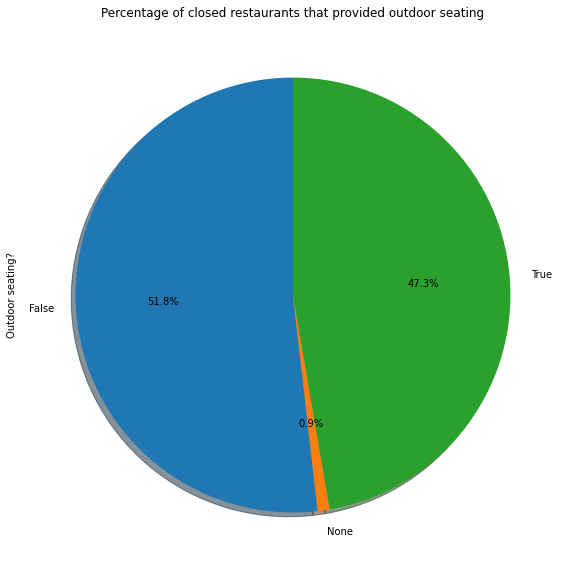

In [ ]:
graph6 = closed_resturants[["attributes.OutdoorSeating"]].groupby(["attributes.OutdoorSeating"]).size()
closed_resturants_outdoor = graph6.plot(kind='pie', subplots=False, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
closed_resturants_outdoor.set_ylabel("Outdoor seating?")
plt.title("Percentage of closed restaurants that provided outdoor seating")
closed_resturants_outdoor

**Second Analysis: Review Sentiment Scores**

Making a dataframe of the Yelp business reviews dataset, and filtering through to only have reviews from the beginning of the COVID-19 pandemic to current day, and then merging with the resturants dataframe based on business_id

In [ ]:
yelp_review = []
for line in open('/content/drive/MyDrive/INST 414 Project/yelp_academic_dataset_review.json', 'r',encoding="cp866"):
    yelp_review.append(json.loads(line))
review_df = json_normalize(yelp_review)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [ ]:
review_df[['Date','Time']] = review_df['date'].str.split(' ', expand=True)

In [ ]:
review_df = review_df.drop(columns=['date', 'Time'])

In [ ]:
review_df = review_df.loc[review_df["Date"].between("2020-01-01", "2022-4-28")]
review_df1 = review_df[['review_id', 'business_id', 'text', 'Date']]

In [ ]:
review_resturants = pd.merge(restaurants_df1,review_df1,how='inner',on=['business_id'])
review_resturants[['business_id', 'name', 'city', 'attributes.RestaurantsTakeOut','attributes.RestaurantsDelivery', 'attributes.OutdoorSeating', 'text', 'Date' ]]

,business_id,name,city,attributes.RestaurantsTakeOut,attributes.RestaurantsDelivery,attributes.OutdoorSeating,text,Date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,True,False,False,We have tried many of the bakeries in Chinatow...,2020-03-18
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,True,False,False,If I'm driving to Philly for some cheese steak...,2020-10-18
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,True,False,False,Support this business! I grabbed 4 pastries he...,2020-06-07
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,True,False,False,I love this place.. I love their chunky fried...,2020-05-25
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,True,False,False,They are still open and fully stocked during t...,2020-05-16
...,...,...,...,...,...,...,...,...
788052,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,Philadelphia,True,True,False,Recently got take out from adelita; they were ...,2021-02-07
788053,2O2K6SXPWv56amqxCECd4w,The Plum Pit,Aston,True,False,NaN,"Absolutely amazing, huge portions and fresh qu...",2021-04-11
788054,2O2K6SXPWv56amqxCECd4w,The Plum Pit,Aston,True,False,NaN,This food truck was stupid. Stupidly delicious...,2021-06-25
788055,2O2K6SXPWv56amqxCECd4w,The Plum Pit,Aston,True,False,NaN,The truck was invited to our office for a part...,2020-02-19


In [ ]:
#making a dataframe that only has resturants that have takeout avaliable, and a dataframe of resturants that have no takeout
takeout = review_resturants.loc[review_resturants['attributes.RestaurantsTakeOut']=="True"]
no_takeout = review_resturants.loc[review_resturants['attributes.RestaurantsTakeOut']!="True"]

In [ ]:
#doing the same as above, but for delivery
delivery = review_resturants.loc[review_resturants['attributes.RestaurantsDelivery']=="True"]
no_delivery = review_resturants.loc[review_resturants['attributes.RestaurantsDelivery'] != "True" ]

In [ ]:
#doing the same as above, but for outdoor seating
outdoor_seating = review_resturants.loc[review_resturants['attributes.OutdoorSeating']=="True"]
no_outdoor_seating = review_resturants.loc[review_resturants['attributes.OutdoorSeating'] != "True" ]

Creating a function that uses a pre-trained natural processing language (NPL) machine learning model (the BERT model) to calulate sentiment scores of resturant reviews. Sentiment score goes from 1 to 5, and the higher the score, the more positive the review is according to the machine learning model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

Calculating sentiment score of reviews for resturants that allow takeout

In [ ]:
takeout_random = takeout.sample(n = 5000)
takeout_random['sentiment_score'] = takeout_random['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
avg_takeout_sentiment = takeout_random[['business_id','sentiment_score']]
avg_takeout_sentiment.columns = ["business_id","Sentiment Score"]
avg_takeout_sentiment
takeout_final = pd.merge(restaurants_df1,avg_takeout_sentiment,how='inner',on=['business_id'])
takeout_final["Sentiment Score"].describe()

count    5000.000000
mean        3.778400
std         1.490818
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Sentiment Score, dtype: float64

In [ ]:
#downloading the dataframe for safe keeping
takeout_final.to_csv('takeout.csv')
files.download('takeout.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculating sentiment score of reviews for resturants that don't allow takeout

In [ ]:
no_takeout_random = no_takeout.sample(n = 5000)
no_takeout_random['sentiment_score'] = no_takeout_random['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
avg_no_takeout_sentiment = no_takeout_random[['business_id','sentiment_score', 'text']]
avg_no_takeout_sentiment.columns = ["business_id","Sentiment Score", 'Review Text']
no_takeout_final = pd.merge(restaurants_df1,avg_no_takeout_sentiment,how='inner',on=['business_id'])
no_takeout_final["Sentiment Score"].describe()

count    5000.000000
mean        3.824400
std         1.444293
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Sentiment Score, dtype: float64

In [ ]:
#downloading the dataframe for safe keeping
no_takeout_final.to_csv('no_takeout.csv')
files.download('no_takeout.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculating sentiment score of reviews for resturants that deliver

In [ ]:
delivery_random_sample = delivery.sample(n = 5000)
delivery_random_sample['sentiment_score'] = delivery_random_sample['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
avg_delivery_sentiment = delivery_random_sample[['business_id','sentiment_score', 'text']]
avg_delivery_sentiment.columns = ["business_id","Sentiment Score", "Review Text"]
delivery_final = pd.merge(restaurants_df1,avg_delivery_sentiment,how='inner',on=['business_id'])
delivery_final["Sentiment Score"].describe()

count    5000.000000
mean        3.710600
std         1.510399
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Sentiment Score, dtype: float64

In [ ]:
#downloading the dataframe for safe keeping
delivery_final.to_csv('delivery.csv')
files.download('delivery.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculating sentiment score of reviews for resturants that don't allow delivery

In [ ]:
no_delivery_random_sample = no_delivery.sample(n = 5000)
no_delivery_random_sample['sentiment_score'] = no_delivery_random_sample['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
avg_no_delivery_sentiment = no_delivery_random_sample[['business_id','sentiment_score', 'text']]
avg_no_delivery_sentiment.columns = ["business_id","Sentiment Score", "Review Text"]
no_delivery_final = pd.merge(restaurants_df1,avg_no_delivery_sentiment,how='inner',on=['business_id'])
no_delivery_final["Sentiment Score"].describe()

count    5000.000000
mean        3.880200
std         1.399228
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Sentiment Score, dtype: float64

In [ ]:
#downloading the dataframe for safe keeping
no_delivery_final.to_csv('no_delivery.csv')
files.download('no_delivery.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculating sentiment score of reviews for resturants that have outdoor seating

In [ ]:
outdoor_random_sample = outdoor_seating.sample(n = 5000)
outdoor_random_sample['sentiment_score'] = outdoor_random_sample['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
avg_outdoor_sentiment = outdoor_random_sample[['business_id','sentiment_score', 'text']]
avg_outdoor_sentiment.columns = ["business_id","Sentiment Score", "Review Text"]
outdoor_final = pd.merge(restaurants_df1,avg_outdoor_sentiment,how='inner',on=['business_id'])
outdoor_final["Sentiment Score"].describe()

count    5000.000000
mean        3.863400
std         1.415748
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Sentiment Score, dtype: float64

In [ ]:
#downloading the dataframe for safe keeping
outdoor_final.to_csv('outdoor.csv')
files.download('outdoor.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
no_outdoor_random_sample = no_outdoor_seating.sample(n = 5000)
no_outdoor_random_sample['sentiment_score'] = no_outdoor_random_sample['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
avg_no_outdoor_sentiment = no_outdoor_random_sample[['business_id','sentiment_score', 'text']]
avg_no_outdoor_sentiment.columns = ["business_id","Sentiment Score", "Review Text"]
no_outdoor_final = pd.merge(restaurants_df1,avg_no_outdoor_sentiment,how='inner',on=['business_id'])
no_outdoor_final["Sentiment Score"].describe()

count    5000.000000
mean        3.647800
std         1.545909
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Sentiment Score, dtype: float64

In [ ]:
#downloading the dataframe for safe keeping
no_outdoor_final.to_csv('no_outdoor.csv')
files.download('no_outdoor.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>